In [195]:
# Import necessary libraries

import pandas as pd
import nltk
#nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
import re
from textblob import TextBlob
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [196]:
# Read in and preview 'cleaned_tweets.csv'

tweets = pd.read_csv('cleaned_tweets.csv', engine='python').drop(['Unnamed: 0'],axis=1)
tweets.head()

,id,tweet,date_time,clean_tweet
0,947702253313495045,Tesla $TSLA Rating Increased to Hold at ValuEngine http://ift.tt/2lzM80m,2018-01-01 00:33:19,rating increase hold valuengine
1,947702742264569857,Tesla $TSLA Rating Increased to Hold at ValuEngine http://ift.tt/2CjAmm2,2018-01-01 00:35:15,rating increase hold valuengine
2,947709627394748416,Horseman Capital Management LTD Increases Position in Tesla INC (TSLA) http://clicklancashire.com/2017/12/31/horseman-capital-management-ltd-increases-position-in-tesla.html …,2018-01-01 01:02:37,horseman capital management ltd increase position inc
3,947712900377976832,Tesla INC (TSLA) Holding Lifted by Horseman Capital Management Ltd http://newburghgazette.com/2017/12/31/tesla-inc-tsla-holding-lifted-by-horseman-capital/ …,2018-01-01 01:15:37,inc hold lifted horseman capital management ltd
4,947732179253170177,"Insider Selling: Tesla Inc (NASDAQ:TSLA) VP Sells 1,400 Shares of Stock http://ift.tt/2lwCJqY",2018-01-01 02:32:14,insider sell inc nasda vp sell share stock


In [197]:
# Look at tesla_tweets data types

tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213213 entries, 0 to 213212
Data columns (total 4 columns):
id             213213 non-null object
tweet          213213 non-null object
date_time      213153 non-null object
clean_tweet    212272 non-null object
dtypes: object(4)
memory usage: 6.5+ MB


In [198]:
# Convert date_time column into datetime stamp

tweets.date_time = pd.to_datetime(tweets.date_time)
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213213 entries, 0 to 213212
Data columns (total 4 columns):
id             213213 non-null object
tweet          213213 non-null object
date_time      213153 non-null datetime64[ns]
clean_tweet    212272 non-null object
dtypes: datetime64[ns](1), object(3)
memory usage: 6.5+ MB


In [199]:
# Check for null values

tweets.isnull().sum()

id               0
tweet            0
date_time       60
clean_tweet    941
dtype: int64

In [200]:
# Drop null values

tweets = tweets.dropna()

## Compute Sentiment Score for Each Tweet

### Calculate Sentiment Score with Vader

In [201]:
# Use sia.polarity_scores to get sentiment for each tweets

tweets['sentiment_1'] = tweets.apply(lambda row: sia.polarity_scores(row.clean_tweet)['compound'], axis=1)
tweets.head()

,id,tweet,date_time,clean_tweet,sentiment_1
0,947702253313495045,Tesla $TSLA Rating Increased to Hold at ValuEngine http://ift.tt/2lzM80m,2018-01-01 00:33:19,rating increase hold valuengine,0.3182
1,947702742264569857,Tesla $TSLA Rating Increased to Hold at ValuEngine http://ift.tt/2CjAmm2,2018-01-01 00:35:15,rating increase hold valuengine,0.3182
2,947709627394748416,Horseman Capital Management LTD Increases Position in Tesla INC (TSLA) http://clicklancashire.com/2017/12/31/horseman-capital-management-ltd-increases-position-in-tesla.html …,2018-01-01 01:02:37,horseman capital management ltd increase position inc,0.3182
3,947712900377976832,Tesla INC (TSLA) Holding Lifted by Horseman Capital Management Ltd http://newburghgazette.com/2017/12/31/tesla-inc-tsla-holding-lifted-by-horseman-capital/ …,2018-01-01 01:15:37,inc hold lifted horseman capital management ltd,0.0000
4,947732179253170177,"Insider Selling: Tesla Inc (NASDAQ:TSLA) VP Sells 1,400 Shares of Stock http://ift.tt/2lwCJqY",2018-01-01 02:32:14,insider sell inc nasda vp sell share stock,0.2960


### Calculate Sentiment Score with TextBlob

In [202]:
# Use TextBlob to get sentiment scores

tweets['sentiment_2'] = tweets.apply(lambda row: TextBlob(row.clean_tweet).sentiment[0], axis=1)
tweets.head()

,id,tweet,date_time,clean_tweet,sentiment_1,sentiment_2
0,947702253313495045,Tesla $TSLA Rating Increased to Hold at ValuEngine http://ift.tt/2lzM80m,2018-01-01 00:33:19,rating increase hold valuengine,0.3182,0.0
1,947702742264569857,Tesla $TSLA Rating Increased to Hold at ValuEngine http://ift.tt/2CjAmm2,2018-01-01 00:35:15,rating increase hold valuengine,0.3182,0.0
2,947709627394748416,Horseman Capital Management LTD Increases Position in Tesla INC (TSLA) http://clicklancashire.com/2017/12/31/horseman-capital-management-ltd-increases-position-in-tesla.html …,2018-01-01 01:02:37,horseman capital management ltd increase position inc,0.3182,0.0
3,947712900377976832,Tesla INC (TSLA) Holding Lifted by Horseman Capital Management Ltd http://newburghgazette.com/2017/12/31/tesla-inc-tsla-holding-lifted-by-horseman-capital/ …,2018-01-01 01:15:37,inc hold lifted horseman capital management ltd,0.0000,0.0
4,947732179253170177,"Insider Selling: Tesla Inc (NASDAQ:TSLA) VP Sells 1,400 Shares of Stock http://ift.tt/2lwCJqY",2018-01-01 02:32:14,insider sell inc nasda vp sell share stock,0.2960,0.0


In [203]:
# Preview how sentiment scores differ on different tweets

pd.options.display.max_colwidth = 300
random_subset = tweets.sample(n=10)
random_subset = random_subset.drop(columns=['id', 'date_time'])
random_subset.rename(columns={'tweet':'Original Tweet'})
random_subset = random_subset.rename(columns={'tweet': 'Original Tweet', 'clean_tweet': 'Cleaned Tweet', 'sentiment_1': 'Vader Sentiment', 'sentiment_2':'TextBlob Sentiment'})
random_subset.head(10)

,Original Tweet,Cleaned Tweet,Vader Sentiment,TextBlob Sentiment
196612,Tesla Model 3 owner lays the case on why the US is better off supporting TSLA | TESLARATI https://www.teslarati.com/tesla-model-3-owner-americans-should-support-tsla/ …,model owner lay case u good support rati,0.6808,0.700000
34610,How Will Tesla $TSLA Stock React to The Latest Coverage By Needham? https://presstelegraph.com/how-will-tesla-nasdaqtsla-stock-react-to-the-latest-coverage-by-needham/ …,stock react late coverage needham,0.0000,-0.300000
120865,"You’re right in part. Middle incomes seems to prefer local cars. However, I think that there is one key element that Alters things in favor of #Tesla: It’s the only viable electric car available and the Model 3 is the only somewhat affordable one. $TSLA $TSLAQ",right part middle incomes seem prefer local car however think one key element alters thing favor viable electric car available model somewhat affordable one,0.4019,0.137143
156932,"$tsla Who needs parts? Seriously, does this person really believe no one is waiting for Tesla parts? https://twitter.com/Crazyinventorg2/status/1106279979690663937 …",need part seriously person really believe one wait part,-0.1779,-0.066667
182880,$TSLA #Banks #underwriters #buy #bought #cheap Ars Technica: Tesla fundraising push blows past $2 billion target. https://arstechnica.com/cars/2019/05/2-34-billion-fundraise-gives-tesla-much-needed-breathing-room/ … via @GoogleNews,bank underwriter buy buy cheap ar technica fundraise push blow past billion target,0.0000,0.075000
185047,"A Tesla Model 3 Produces More CO2 than a Diesel Car, Says New Study https://interestingengineering.com/a-tesla-model-3-produces-more-co2-than-a-diesel-car-says-new-study … $TSLA $TSLAQ https://twitter.com/Tesla/status/1126575043281080323 …",model produce co diesel car say new study,0.0000,0.136364
191414,"Yes, and of course she’ll never follow up on that video and admit she was wrong. Just move onto the next thing like “Tesla will be out of cash in 10 months like Elon said” @lopezlinette it’s pure comedy $tsla $tslaQ",yes course never follow video admit wrong move onto next thing like cash month like elon say lopezlinette pure comedy,0.6713,-0.095238
190006,"Jaded Tesla investors are getting sick of Elon Musk's big, flashy promises. Here's what the company should do instead to turn things around. (TSLA) http://bit.ly/2JWHCGL",jade investor get sick elon musk big flashy promise company instead turn thing around,-0.2500,-0.404762
85711,What a fun Tesla thing to do. $TSLA https://twitter.com/S_Padival/status/1040420457361563648 …,fun thing,0.5106,0.300000
132621,"So if Tesla is employing a big check kiting scheme, what happens when sales decrease? Hmmmmm.... $TSLA $TSLAQ https://twitter.com/PlugInFUD/status/1085312357176406016 …",employ big check kit scheme happen sale decrease hmmmmm,0.0000,0.000000


In [204]:
tweets.shape

(212242, 6)

## EDA

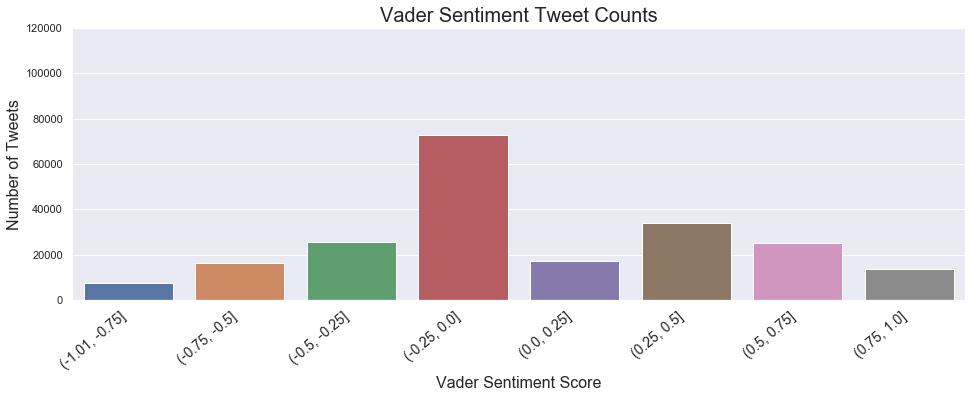

In [206]:
# View count of tweets for binned sentiment_1

bins = [-1.01, -.75, -.5, -.25, 0, .25, .5, .75, 1]
tweets['binned_s1'] = pd.cut(tweets['sentiment_1'], bins)
plt.figure(figsize=(16,5))
ax = sns.countplot(x=tweets['binned_s1'])
ax.set_ylabel('Number of Tweets', fontsize=16)
ax.set_xlabel('Vader Sentiment Score', fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=14)
ax.set_title("Vader Sentiment Tweet Counts", fontsize=20)
ax.set_ylim(0, 120000)
plt.show()

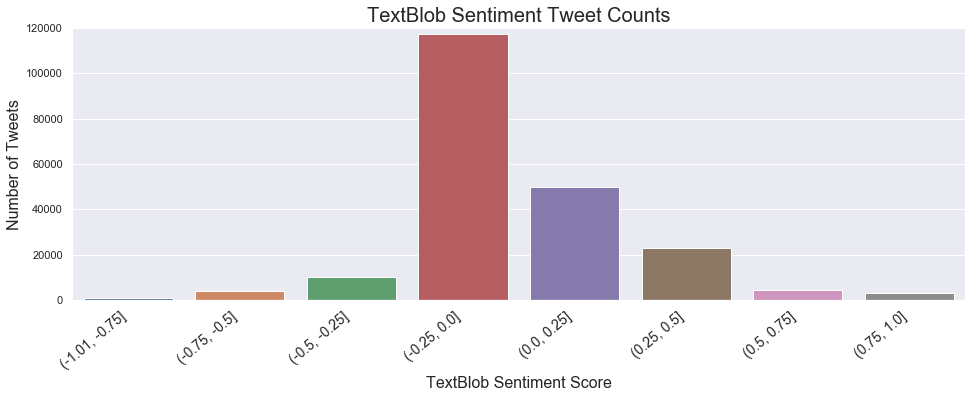

In [207]:
# View count of tweets for binned sentiment_2

bins = [-1.01, -.75, -.5, -.25, 0, .25, .5, .75, 1]
tweets['binned_s2'] = pd.cut(tweets['sentiment_2'], bins)
plt.figure(figsize=(16,5))
ax = sns.countplot(x=tweets['binned_s2'])
ax.set_ylabel('Number of Tweets', fontsize=16)
ax.set_xlabel('TextBlob Sentiment Score', fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=14)
ax.set_title("TextBlob Sentiment Tweet Counts", fontsize=20)
ax.set_ylim(0, 120000)
plt.show()

In [208]:
# Tweet with the highest sentiment_1 

print(tweets.loc[tweets['sentiment_1'].idxmax()])

id                                                                                                                                                                                                                                                           1093935106132271104
tweet          Uhhh,,,yeah,,,yeahhh,,, super exciting,,, super,,, like,,, yeah, yeah,,, it probably, definitely, yeah, yeah, definitely, maybe,,, yeah like it's super,,, yeah, definitely maybe, yeah,,,lol #thoughtsofgenius #tinfoilchucker $tsla  pic.twitter.com/skEsr4XwRT
date_time                                                                                                                                                                                                                                                    2019-02-08 13:10:28
clean_tweet                                                       uhhh yeah yeahhh super excite super like yeah yeah probably definitely yeah yeah definitely maybe yeah like super y

In [209]:
# Tweet with the samllest sentiment_1

print(tweets.loc[tweets['sentiment_1'].idxmin()])

id                                                                                                                                                                                                                                                                                                     1125361328682672128
tweet          $TSLA $TSLAQ 2003: LOSS 2004: LOSS 2005: LOSS 2006: LOSS 2007: LOSS 2008: LOSS 2009: LOSS 2010: LOSS 2011: LOSS 2012: LOSS 2013: LOSS 2014: LOSS 2015: LOSS 2016: LOSS 2017: LOSS 2018: LOSS 2019: Already puked out a $700 million loss. Let's see if you can connect the dots. pic.twitter.com/2n9FOrb6m4
date_time                                                                                                                                                                                                                                                                                              2019-05-06 07:27:03
clean_tweet                                            

In [210]:
# Tweet with the highest sentiment_2

print(tweets.loc[tweets['sentiment_2'].idxmax()])

id                                                                                                                                                                     948653508730896384
tweet          $TSLA $GM:  The Best-Selling EV in the US After Tesla? The Chevy Bolt:   http://www.StockNewsWires.com/tsla-gm-the-best-selling-ev-in-the-us-after-tesla-the-chevy-bolt/ …
date_time                                                                                                                                                             2018-01-03 15:33:16
clean_tweet                                                                                                                                              gm best selling ev u  chevy bolt
sentiment_1                                                                                                                                                                        0.6369
sentiment_2                                                           

In [211]:
# Tweet with the samllest sentiment_2

print(tweets.loc[tweets['sentiment_2'].idxmin()])

id                                                                                                                                                           948675122080112640
tweet          Tesla's Model 3 deliveries were awful — but the company still set a sales record for 2017 (TSLA)  http://dlvr.it/Q8mFbK  #storystream pic.twitter.com/OxscGEUYtm
date_time                                                                                                                                                   2018-01-03 16:59:09
clean_tweet                                                                                                                 model delivery awful company still set sale record 
sentiment_1                                                                                                                                                             -0.4588
sentiment_2                                                                                                             

### EDA with Daily Sentiment

In [212]:
daily_sentiment1 = tweets[['date_time','sentiment_1', 'sentiment_2']]
daily_sentiment1.head()

,date_time,sentiment_1,sentiment_2
0,2018-01-01 00:33:19,0.3182,0.0
1,2018-01-01 00:35:15,0.3182,0.0
2,2018-01-01 01:02:37,0.3182,0.0
3,2018-01-01 01:15:37,0.0000,0.0
4,2018-01-01 02:32:14,0.2960,0.0


In [213]:
daily_sentiment1 = daily_sentiment1.resample('D', on='date_time').mean()
daily_sentiment1.head()

,sentiment_1,sentiment_2
date_time,,
2018-01-01,0.151495,0.072671
2018-01-02,0.128540,0.020339
2018-01-03,-0.076401,-0.042189
2018-01-04,-0.021646,0.005735
2018-01-05,0.053596,0.037756


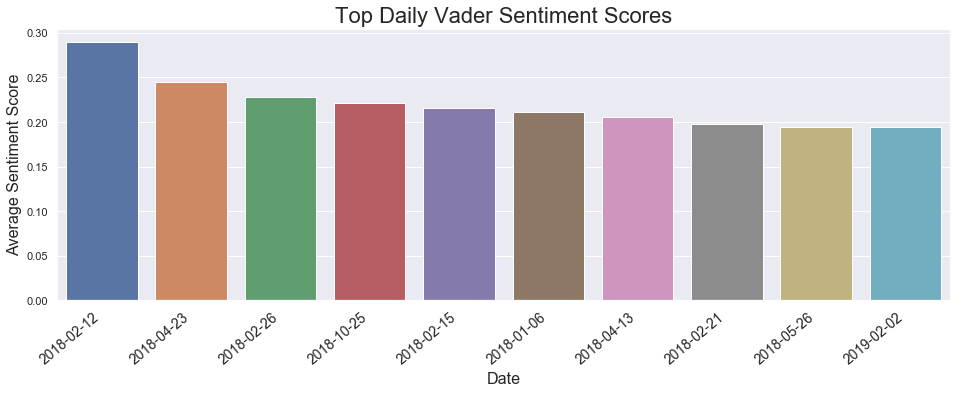

In [214]:
# Find the days with the highest sentiment_1

freq_df = daily_sentiment1.nlargest(columns="sentiment_1", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=freq_df, x= freq_df.index.date, y = freq_df['sentiment_1'])
ax.set_ylabel('Average Sentiment Score', fontsize=16)
ax.set_xlabel('Date', fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=14)
ax.set_title('Top Daily Vader Sentiment Scores', fontsize=22)
plt.show()

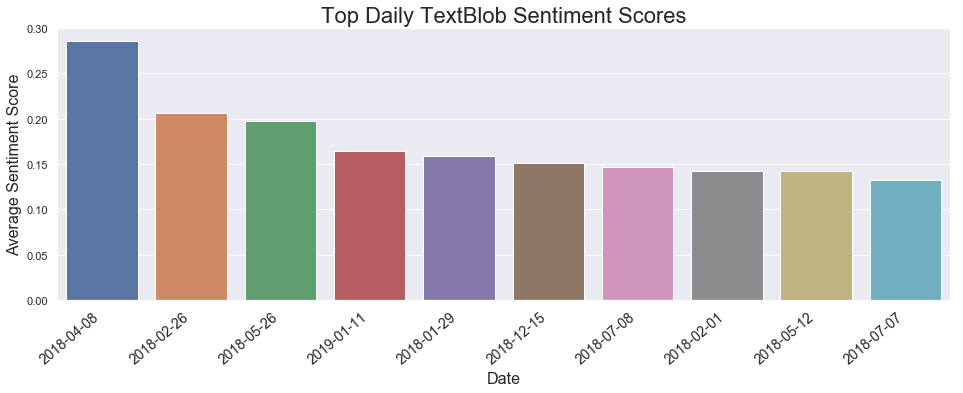

In [215]:
# Find the days with the highest sentiment_2

freq_df = daily_sentiment1.nlargest(columns="sentiment_2", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=freq_df, x= freq_df.index.date, y = freq_df['sentiment_2'])
ax.set_ylabel('Average Sentiment Score', fontsize=16)
ax.set_xlabel('Date', fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=14)
ax.set_title('Top Daily TextBlob Sentiment Scores', fontsize=22)
plt.show()

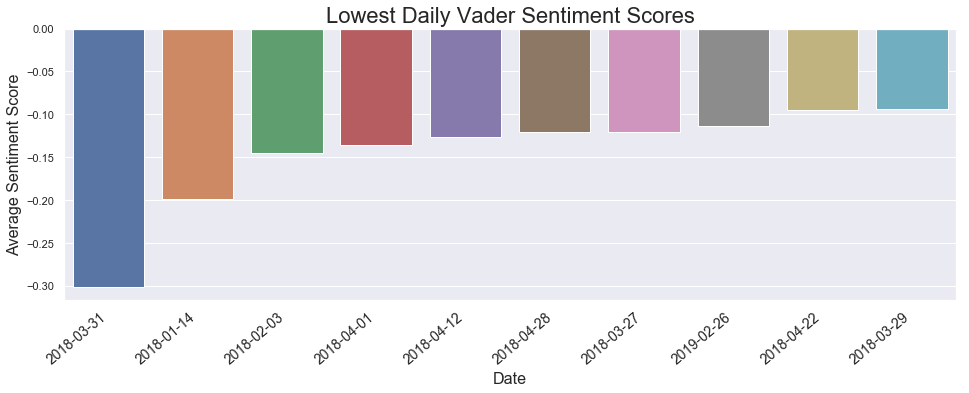

In [216]:
# Find the days with the lowest sentiment_1

freq_df = daily_sentiment1.nsmallest(columns="sentiment_1", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=freq_df, x= freq_df.index.date, y = freq_df['sentiment_1'])
ax.set_ylabel('Average Sentiment Score', fontsize=16)
ax.set_xlabel('Date', fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=14)
ax.set_title('Lowest Daily Vader Sentiment Scores', fontsize=22)

plt.show()

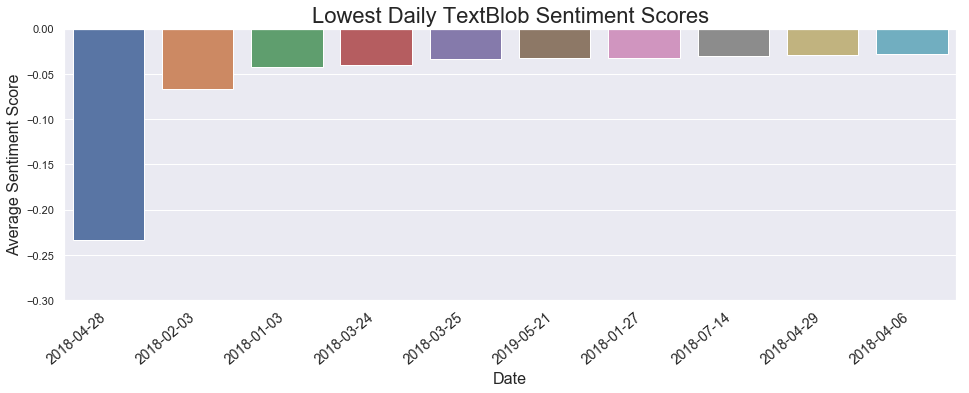

In [217]:
# Find the days with the lowest sentiment_2

freq_df = daily_sentiment1.nsmallest(columns="sentiment_2", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=freq_df, x= freq_df.index.date, y = freq_df['sentiment_2'])
ax.set_ylabel('Average Sentiment Score', fontsize=16)
ax.set_xlabel('Date', fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=14)
ax.set_title('Lowest Daily TextBlob Sentiment Scores', fontsize=22)
ax.set_ylim(-.3, 0)
plt.show()

### Remove Tweets After 3:55 pm

In [246]:
# Create new dataframe with only tweets from before 3:55

remove_late_tweets = tweets.copy()
remove_late_tweets.set_index(pd.to_datetime(remove_late_tweets.date_time), inplace = True)
remove_late_tweets = remove_late_tweets.drop(columns = ['date_time'])
remove_late_tweets = remove_late_tweets.between_time('00:00:00', '15:55:00')
remove_late_tweets.head()

,id,tweet,clean_tweet,sentiment_1,sentiment_2,binned_s1,binned_s2
date_time,,,,,,,
2018-01-01 00:33:19,947702253313495045,Tesla $TSLA Rating Increased to Hold at ValuEngine http://ift.tt/2lzM80m,rating increase hold valuengine,0.3182,0.0,"(0.25, 0.5]","(-0.25, 0.0]"
2018-01-01 00:35:15,947702742264569857,Tesla $TSLA Rating Increased to Hold at ValuEngine http://ift.tt/2CjAmm2,rating increase hold valuengine,0.3182,0.0,"(0.25, 0.5]","(-0.25, 0.0]"
2018-01-01 01:02:37,947709627394748416,Horseman Capital Management LTD Increases Position in Tesla INC (TSLA) http://clicklancashire.com/2017/12/31/horseman-capital-management-ltd-increases-position-in-tesla.html …,horseman capital management ltd increase position inc,0.3182,0.0,"(0.25, 0.5]","(-0.25, 0.0]"
2018-01-01 01:15:37,947712900377976832,Tesla INC (TSLA) Holding Lifted by Horseman Capital Management Ltd http://newburghgazette.com/2017/12/31/tesla-inc-tsla-holding-lifted-by-horseman-capital/ …,inc hold lifted horseman capital management ltd,0.0000,0.0,"(-0.25, 0.0]","(-0.25, 0.0]"
2018-01-01 02:32:14,947732179253170177,"Insider Selling: Tesla Inc (NASDAQ:TSLA) VP Sells 1,400 Shares of Stock http://ift.tt/2lwCJqY",insider sell inc nasda vp sell share stock,0.2960,0.0,"(0.25, 0.5]","(-0.25, 0.0]"


In [247]:
# Get new daily sentiment score based on tweets before 3:55 pm

early_sentiment = remove_late_tweets.copy()
early_sentiment = early_sentiment.resample('D').mean()
early_sentiment.head()

,sentiment_1,sentiment_2
date_time,,
2018-01-01,0.159220,0.056144
2018-01-02,0.129106,0.010886
2018-01-03,-0.139748,-0.054146
2018-01-04,-0.062928,0.012496
2018-01-05,0.050091,0.026263


In [248]:
# Check there are no null values

early_sentiment.isnull().sum()

sentiment_1    0
sentiment_2    0
dtype: int64

### Remove Tweets with Sentiment Scores of 0

In [249]:
remove_s1_0 = remove_late_tweets.copy()
remove_s1_0 = remove_s1_0.rename(columns={'sentiment_1':'s1_no_0'})
remove_s1_0.head()

,id,tweet,clean_tweet,s1_no_0,sentiment_2,binned_s1,binned_s2
date_time,,,,,,,
2018-01-01 00:33:19,947702253313495045,Tesla $TSLA Rating Increased to Hold at ValuEngine http://ift.tt/2lzM80m,rating increase hold valuengine,0.3182,0.0,"(0.25, 0.5]","(-0.25, 0.0]"
2018-01-01 00:35:15,947702742264569857,Tesla $TSLA Rating Increased to Hold at ValuEngine http://ift.tt/2CjAmm2,rating increase hold valuengine,0.3182,0.0,"(0.25, 0.5]","(-0.25, 0.0]"
2018-01-01 01:02:37,947709627394748416,Horseman Capital Management LTD Increases Position in Tesla INC (TSLA) http://clicklancashire.com/2017/12/31/horseman-capital-management-ltd-increases-position-in-tesla.html …,horseman capital management ltd increase position inc,0.3182,0.0,"(0.25, 0.5]","(-0.25, 0.0]"
2018-01-01 01:15:37,947712900377976832,Tesla INC (TSLA) Holding Lifted by Horseman Capital Management Ltd http://newburghgazette.com/2017/12/31/tesla-inc-tsla-holding-lifted-by-horseman-capital/ …,inc hold lifted horseman capital management ltd,0.0000,0.0,"(-0.25, 0.0]","(-0.25, 0.0]"
2018-01-01 02:32:14,947732179253170177,"Insider Selling: Tesla Inc (NASDAQ:TSLA) VP Sells 1,400 Shares of Stock http://ift.tt/2lwCJqY",insider sell inc nasda vp sell share stock,0.2960,0.0,"(0.25, 0.5]","(-0.25, 0.0]"


In [250]:
# Check how many tweets had sentiment scores of 0

print('There are ' + str((remove_s1_0.s1_no_0 == 0).sum()) + ' tweets with a Vader Sentiment Score of 0')
print('There are ' + str((remove_s1_0.sentiment_2 == 0).sum()) + ' tweets with a TextBlob Sentiment Score of 0')

There are 40809 tweets with a Vader Sentiment Score of 0
There are 63226 tweets with a TextBlob Sentiment Score of 0


In [251]:
len(remove_s1_0.s1_no_0)

146923

In [252]:
# Remove tweets with 0 for sentiment_1 scores

remove_s1_0 = remove_s1_0[remove_s1_0.s1_no_0 != 0]
(remove_s1_0.s1_no_0 == 0).sum()

0

In [253]:
# Remove tweets with 0 for sentiment_2 scores

remove_s2_0 = remove_late_tweets.copy()
remove_s2_0 = remove_s2_0.rename(columns={'sentiment_2':'s2_no_0'})
remove_s2_0 = remove_s2_0[remove_s2_0.s2_no_0 != 0]
(remove_s2_0.s2_no_0 == 0).sum()


0

In [254]:
# Resample on date

remove_s1_0 = remove_s1_0.resample('D').mean()
remove_s2_0 = remove_s2_0.resample('D').mean()

In [255]:
# Check that there are no null values

remove_s1_0.isnull().sum()

s1_no_0        0
sentiment_2    0
dtype: int64

In [256]:
# Check that there are no null values

remove_s2_0.isnull().sum()

sentiment_1    0
s2_no_0        0
dtype: int64

In [257]:
# Add updated columns back to early_tweets dataframe

early_sentiment['s1_no_0'] = remove_s1_0.s1_no_0.values
early_sentiment['s2_no_0'] = remove_s2_0.s2_no_0.values
early_sentiment.head()

,sentiment_1,sentiment_2,s1_no_0,s2_no_0
date_time,,,,
2018-01-01,0.159220,0.056144,0.253756,0.204524
2018-01-02,0.129106,0.010886,0.163974,0.065315
2018-01-03,-0.139748,-0.054146,-0.204682,-0.087235
2018-01-04,-0.062928,0.012496,-0.086355,0.027508
2018-01-05,0.050091,0.026263,0.089410,0.069200


In [262]:
# Replace the daily sentiments with the daily sentiments calculated before 3:55 pm

daily_sentiment = early_sentiment.copy()

In [263]:
daily_sentiment.head()

,sentiment_1,sentiment_2,s1_no_0,s2_no_0
date_time,,,,
2018-01-01,0.159220,0.056144,0.253756,0.204524
2018-01-02,0.129106,0.010886,0.163974,0.065315
2018-01-03,-0.139748,-0.054146,-0.204682,-0.087235
2018-01-04,-0.062928,0.012496,-0.086355,0.027508
2018-01-05,0.050091,0.026263,0.089410,0.069200


## Scaling Sentiment Scores

In [264]:
# Scale columns 'sentiment_1' & 'sentiment_2'

scaler = MinMaxScaler(feature_range=(-1, 1), copy=True)
daily_sentiment['s1_scaled'] = scaler.fit_transform(daily_sentiment[['sentiment_1']])
daily_sentiment['s2_scaled'] = scaler.fit_transform(daily_sentiment[['sentiment_2']])
daily_sentiment.head()

,sentiment_1,sentiment_2,s1_no_0,s2_no_0,s1_scaled,s2_scaled
date_time,,,,,,
2018-01-01,0.159220,0.056144,0.253756,0.204524,0.545814,0.017779
2018-01-02,0.129106,0.010886,0.163974,0.065315,0.447675,-0.136340
2018-01-03,-0.139748,-0.054146,-0.204682,-0.087235,-0.428520,-0.357795
2018-01-04,-0.062928,0.012496,-0.086355,0.027508,-0.178162,-0.130857
2018-01-05,0.050091,0.026263,0.089410,0.069200,0.190164,-0.083976


## Save Tweets with Sentiment

In [265]:
filepath = r'/Users/erikadauria/Flatiron/Projects/Tesla_Twitter_Sentiment_Analysis/daily_sentiment_scores.csv'

In [266]:
daily_sentiment.to_csv(filepath, header=True)

In [267]:
test = pd.read_csv('daily_sentiment_scores.csv')
test.head()

,date_time,sentiment_1,sentiment_2,s1_no_0,s2_no_0,s1_scaled,s2_scaled
0,2018-01-01,0.159220,0.056144,0.253756,0.204524,0.545814,0.017779
1,2018-01-02,0.129106,0.010886,0.163974,0.065315,0.447675,-0.136340
2,2018-01-03,-0.139748,-0.054146,-0.204682,-0.087235,-0.428520,-0.357795
3,2018-01-04,-0.062928,0.012496,-0.086355,0.027508,-0.178162,-0.130857
4,2018-01-05,0.050091,0.026263,0.089410,0.069200,0.190164,-0.083976
